# UFO sightings

Exploratory data analysis of UFO sightings taken from https://www.kaggle.com/NUFORC/ufo-sightings

In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 5)

Let's read the CSV file and take a look at the columns we have.

In [2]:
sightings = pd.read_csv('../data/ufo-sightings/scrubbed.csv', low_memory=False)
sightings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [3]:
sightings.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


#### Add columns
We'll create four new columns (time, day, month and year) based on the information from column 'datetime' so that we can manipulate those four values separately.

In [4]:
sightings['month'] = sightings.datetime.str.split('/').str[0]
sightings['day'] = sightings.datetime.str.split('/').str[1]
sightings['year'] = sightings.datetime.str.split('/').str[2].str.split(' ').str[0]
sightings['time'] = sightings.datetime.str.split('/').str[2].str.split(' ').str[1]

sightings.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,day,year,time
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,10,1949,20:30
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,10,10,1949,21:00
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,10,10,1955,17:00
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10,10,1956,21:00
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10,10,1960,20:00


This could also be summarized in one line, like this:

```python
sightings = sightings.assign(month=((sightings.datetime.str.split('/')).str[0]),\
                             day=((sightings.datetime.str.split('/')).str[1]),\
                             year=((sightings.datetime.str.split('/')).str[2]\
                                 .str.split(' ').str[0]),\
                             time=((sightings.datetime.str.split('/')).str[2]\
                                 .str.split(' ').str[1]))
```

A simpler way would have been to convert the `datetime` column to the format datetime and then parse it by accessing each value directly:

```python
sightings['datetime'] = pd.to_datetime(sightings['datetime'], errors='coerce')
sightings = sightings.assign(month=sightings.datetime.dt.month,\
                             day=sightings.datetime.dt.day,\
                             year=sightings.datetime.dt.year,\
                             time=sightings.datetime.dt.time)
```


#### Convert data types
Let's try to convert the data type of the column 'duration (seconds)' to numeric and see what happens:

In [5]:
sightings['duration (seconds)'] = sightings['duration (seconds)'].apply(pd.to_numeric)

ValueError: Unable to parse string "2`" at position 0

We get an error saying that it couldn't be converted since there's a non-numerical character in at least one of the fields. Se we'll use `rstrip` to remove it from all possible entries and try again.

In [6]:
sightings['duration (seconds)'] = sightings['duration (seconds)'].map(lambda x: x.rstrip('`'))
sightings['duration (seconds)'] = sightings['duration (seconds)'].apply(pd.to_numeric)
sightings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 15 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null float64
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
month                   80332 non-null object
day                     80332 non-null object
year                    80332 non-null object
time                    80332 non-null object
dtypes: float64(2), object(13)
memory usage: 9.2+ MB


## Sightings by country

We'll try to determine which country has the most amount of UFO sightings in our data frame.

In [7]:
# We'll create a new data frame withe the countries as indexes and the amount of sightings for each one.
sightings_cty = sightings.groupby('country').size().to_frame('cantidad')

# Now we'll sort them in descending order to see which one is at the top.
sightings_cty = sightings_cty.sort_values('cantidad', ascending=False)
sightings_cty

,cantidad
country,
us,65114
ca,3000
gb,1905
au,538
de,105


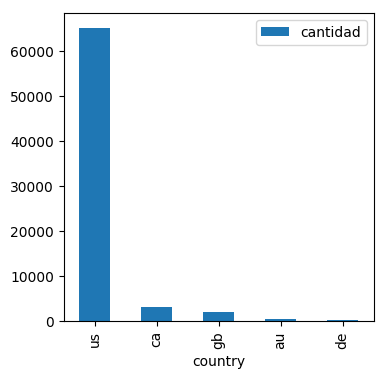

In [8]:
sightings_cty.plot(kind='bar', figsize=(4, 4))

We've got sightings from five different countries and the USA is by far the one with the most amount of them.

## UFO shapes

Let's do the same with the shapes to see which is the most common shape of UFOs.

In [9]:
sightings_shapes = sightings.groupby('shape').size().to_frame('amount')

sightings_shapes['perc'] = (sightings_shapes['amount']/sightings_shapes['amount'].sum())*100
sightings_shapes = sightings_shapes.sort_values('amount', ascending=False)
sightings_shapes

,amount,perc
shape,,
light,16565,21.128827
triangle,7865,10.031888
circle,7608,9.704082
fireball,6208,7.918367
other,5649,7.205357
unknown,5584,7.122449
sphere,5387,6.871173
disk,5213,6.649235
oval,3733,4.761480


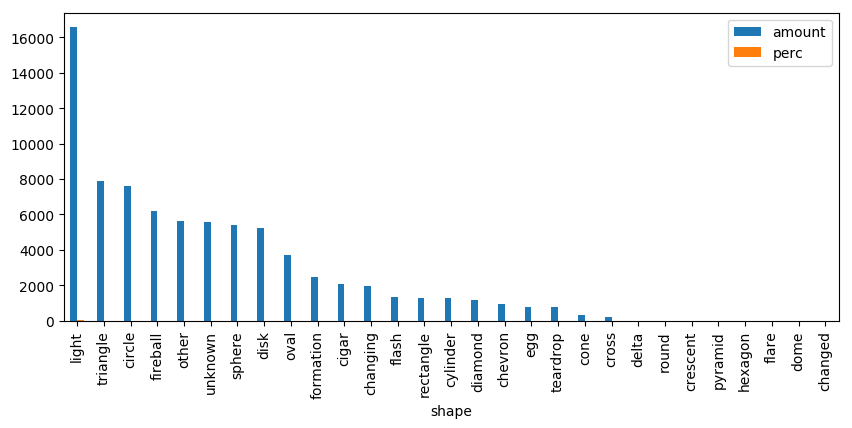

In [10]:
sightings_shapes.plot(kind='bar', figsize=(10,4))

The most common UFO shape is light.

Now we'll analyze the mean duration of each shape.

In [11]:
sightings.loc[:,['shape','duration (seconds)']].groupby('shape').mean()\
    .sort_values('duration (seconds)', ascending=False)

,duration (seconds)
shape,
cone,82827.405063
sphere,21787.298238
other,20634.210977
crescent,18905.000000
light,13170.345373
unknown,5546.723104
flash,5330.289421
circle,4767.466062
fireball,4023.941484


## Sightings in the USA

In [12]:
sightings_us = sightings[sightings['country'] == 'us']
sightings_us.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,day,year,time
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,10,1949,20:30
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10,10,1956,21:00
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10,10,1960,20:00
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,10,10,1961,19:00
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,10,10,1965,23:45


### States with the most amount of sightings

In [13]:
sightings_states = sightings_us.groupby('state').size().to_frame('cantidad')
sightings_states = sightings_states.sort_values('cantidad', ascending=False)
sightings_states.head(5)

,cantidad
state,
ca,8912
wa,3966
fl,3835
tx,3447
ny,2980


### Sightings in Washington DC

In [14]:
sightings_us.loc[sightings_us.city.str.contains('washington') & (sightings_us['state'] == 'dc'),:]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,day,year,time
17191,12/11/2011 20:08,washington,dc,us,cylinder,4.0,4 seconds,Luminous object thought to be a star?,1/12/2012,38.8950000,-77.036667,12,11,2011,20:08
23955,1/29/2012 19:20,washington,dc,us,other,10.0,8 to 10 seconds,A group of darting/revolving round white light...,2/3/2012,38.8950000,-77.036667,1,29,2012,19:20
59804,7/25/2012 21:30,washington,dc,us,changing,900.0,10-15 minutes,3 objects in 15 minutes&#44 2 balls of light m...,8/19/2012,38.8950000,-77.036667,7,25,2012,21:30
62443,7/4/2012 21:06,washington,dc,us,sphere,5.5,5.5 seconds,Luminous spheres in flight&#44 then suddenly v...,8/5/2012,38.8950000,-77.036667,7,4,2012,21:06
70298,8/28/2010 22:06,washington,dc,us,fireball,120.0,2 minutes,Red flaming object flying low over Washington ...,8/30/2010,38.8950000,-77.036667,8,28,2010,22:06
72707,8/9/2012 03:00,washington,dc,us,light,600.0,10 minutes,6 glowing objects fly near roof. (reoccuring),8/19/2012,38.8950000,-77.036667,8,9,2012,03:00


There were six UFO sightings in Washington DC of six different shapes.

#### Sightings in the USA in the year 2000

In [15]:
sightings_us.loc[sightings.year == '2000',:].count()

datetime                2184
city                    2184
state                   2184
country                 2184
shape                   2149
duration (seconds)      2184
duration (hours/min)    2184
comments                2184
date posted             2184
latitude                2184
longitude               2184
month                   2184
day                     2184
year                    2184
time                    2184
dtype: int64

## Sightings in Canada in 2010

Let's see how many UFO sightings were there in Canada in 2010:

In [16]:
sightings[(sightings['country'] == 'ca') & (sightings['year'] == '2010')].count()

datetime                137
city                    137
state                   137
country                 137
shape                   136
duration (seconds)      137
duration (hours/min)    137
comments                137
date posted             137
latitude                137
longitude               137
month                   137
day                     137
year                    137
time                    137
dtype: int64

## Sightings in march 2004 by duration

We'll create a new data frame with the sightings of 2004 and sort them by the duration in a descending order to see the top ten.

In [17]:
sightings_march_04 = sightings.loc[(sightings['month'] == '3') & (sightings['year'] == '2004'),:]

sightings_march_04.sort_values('duration (seconds)', ascending=False).head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,day,year,time
31319,3/14/2004 19:00,las vegas,nv,us,light,345600.0,of and on 4 days,If anyone around us has a chance&#44 this is h...,3/23/2004,36.1750000,-115.136389,3,14,2004,19:00
34776,3/5/2004 02:00,springer (nm)/colorado city (co),co,NaN,disk,73800.0,2 1/2 hrs,Large craft with blue lights followed me,4/27/2004,40.581761,-104.983766,3,5,2004,02:00
30886,3/12/2004 18:00,rockwell city,ia,us,light,14400.0,4 hours,Cluster of lights in the sky,3/23/2004,42.3952778,-94.633611,3,12,2004,18:00
32704,3/21/2004 21:00,woodward,ok,us,other,14400.0,4 hours,Star looking object moving in zig zagging shap...,3/23/2004,36.4336111,-99.390000,3,21,2004,21:00
33728,3/27/2004 20:30,rigaud (canada),qc,ca,light,14400.0,4 hours,Il &eacute;rait environ 8 heures lorsque nous ...,3/29/2004,45.466667,-74.300000,3,27,2004,20:30
33870,3/28/2004 19:00,north vernon,in,us,circle,10800.0,3 hours,Round shape with a dip in the top and bottom,3/29/2004,39.0061111,-85.623611,3,28,2004,19:00
31659,3/15/2004 20:00,adelaide (south australia),NaN,au,formation,10800.0,1-3 hrs,ive got three different cases to report.The fi...,5/15/2006,-34.928661,138.598633,3,15,2004,20:00
32041,3/17/2004 22:00,san diego,ca,us,circle,10800.0,2-3 hours,the object jeted across the sky like a shootin...,9/2/2005,32.7152778,-117.156389,3,17,2004,22:00
30235,3/10/2004 09:00,baltimore,md,us,unknown,10800.0,3hours,V shaped slow moving star like,3/17/2004,39.2902778,-76.612500,3,10,2004,09:00
35487,3/9/2004 19:00,shelby,oh,us,light,10800.0,3 hours,Bright white changed to yellow-orange light mo...,3/17/2004,40.8813889,-82.661944,3,9,2004,19:00


The longest UFO sighting in march 2004 occured in Las Vegas, NV and lasted four days!

### Sightings by duration (all time)

Let's see the top 20 records of sightings by duration.

In [18]:
sightings.sort_values('duration (seconds)', ascending=False).head(20)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,day,year,time
559,10/1/1983 17:00,birmingham (uk/england),NaN,gb,sphere,97836000.0,31 years,Firstly&#44 I was stunned and stared at the ob...,4/12/2013,52.466667,-1.916667,10,1,1983,17:00
53384,6/3/2010 23:30,ottawa (canada),on,ca,other,82800000.0,23000hrs,((HOAX??)) I was out in a field near mil&#44 ...,7/6/2010,45.416667,-75.700000,6,3,2010,23:30
74660,9/15/1991 18:00,greenbrier,ar,us,light,66276000.0,21 years,Orange or amber balls or orbs of light multipl...,3/31/2008,35.2338889,-92.387500,9,15,1991,18:00
64390,8/10/2012 21:00,finley,wa,us,light,52623200.0,2 months,There have been several flying objects in a pe...,8/19/2012,46.1541667,-119.032778,8,10,2012,21:00
38261,4/2/1983 24:00,dont know,NaN,NaN,NaN,52623200.0,2 months,Hi&#44 I&#8217;m writing to you because I wan...,7/25/2004,41.730561,-78.682099,4,2,1983,24:00
69215,8/24/2002 01:00,englewood,fl,us,light,52623200.0,2 months,bright stars&#44 moving erratically&#44 over t...,8/28/2002,26.9616667,-82.352778,8,24,2002,01:00
52709,6/30/1969 22:45,somerset (uk/england),NaN,gb,cone,25248000.0,8 years,First time it was a bright light and missing t...,8/5/2009,51.083333,-3.000000,6,30,1969,22:45
71172,8/3/2008 21:00,virginia beach,va,us,fireball,10526400.0,4 months,this object was very high up and emmited no so...,8/12/2008,36.8527778,-75.978333,8,3,2008,21:00
6991,10/7/2013 20:00,oklahoma,ok,NaN,circle,10526400.0,4 months,Bright flying orb.,10/14/2013,35.46756,-97.516428,10,7,2013,20:00
30596,3/1/1994 01:00,menifee,ca,us,unknown,10526400.0,4 months,Sun City / Menifee UFO sightings in 1994,2/22/2005,33.7283333,-117.145556,3,1,1994,01:00


## Shortest sighting in march 2007

In [19]:
sightings.loc[(sightings['month'] == '3') & (sightings['year'] == '2007'),:]\
    .sort_values('duration (seconds)', ascending=True).head(1)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,day,year,time
33033,3/22/2007 22:15,corvallis,or,us,light,1.0,one-half second,Round&#44 white light with halo effect appear...,4/27/2007,44.5647222,-123.260833,3,22,2007,22:15


### Shortest sighting ever

In [20]:
sightings.sort_values('duration (seconds)', ascending=True).head(1)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,day,year,time
4081,10/23/2008 04:45,remote,wy,NaN,flash,0.001,0.001sec,brilliant strobe light at 4am&#44 moving light...,1/10/2009,-46.163992,169.87505,10,23,2008,04:45
